In [1]:
# import dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

emission_data = os.path.join('..', 'Emission-by-Country', 'GCB2022v27_MtCO2_flat.csv')
emission_data = pd.read_csv(emission_data)
emission_data_df.head()

In [2]:
file_path = "GCB2022v27_MtCO2_flat.csv"
df_emission = pd.read_csv(file_path)
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_emission.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [4]:
df_emission.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [5]:
df_emission['Year'] = df_emission['Year'].astype(int)
df_emission.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [6]:
df_emission_after2000 = df_emission.loc[(df_emission['Year'] >= 2000)
                     & (df_emission['Year'] < 2021)]
df_emission_after2000

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
250,Afghanistan,AFG,2000,1.047128,0.003664,0.787760,0.223504,0.010216,0.021984,NaN,0.053581
251,Afghanistan,AFG,2001,1.069098,0.069616,0.762112,0.208848,0.006538,0.021984,NaN,0.054300
252,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.000000,NaN,0.063856
253,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.000000,NaN,0.068871
254,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.000000,NaN,0.052529
...,...,...,...,...,...,...,...,...,...,...,...
63098,Global,WLD,2016,35524.193212,14360.605245,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633


In [7]:
# Global (Country)
df_emission_after2000_GLOBAL = df_emission_after2000.loc[(df_emission_after2000['Country'] == 'Global')]
df_emission_after2000_GLOBAL

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63082,Global,WLD,2000,25453.622139,9203.117603,10302.090594,4731.291034,721.927315,278.928472,216.267121,4.139541
63083,Global,WLD,2001,25668.048326,9255.256797,10390.668975,4773.584851,754.331663,281.128017,213.078023,4.119578
63084,Global,WLD,2002,26281.037468,9678.959137,10385.864180,4905.853640,796.052479,298.553835,215.754196,4.163394
63085,Global,WLD,2003,27651.596453,10518.463642,10679.654448,5081.468111,852.252693,299.375515,220.382043,4.324685
63086,Global,WLD,2004,28636.695037,10871.584335,11042.504634,5257.190057,910.566319,323.802545,231.047147,4.422142
63087,Global,WLD,2005,29614.602256,11543.334878,11139.399176,5380.665522,964.306101,345.094230,241.802350,4.515677
63088,Global,WLD,2006,30593.116788,12188.840276,11246.321550,5506.809201,1051.668722,346.860142,252.616896,4.606415
63089,Global,WLD,2007,31506.789200,12776.360246,11283.665343,5694.133805,1129.389392,363.985324,259.255090,4.684364
63090,Global,WLD,2008,32085.836322,13192.796643,11251.325081,5864.291234,1143.738362,374.074157,259.610844,4.710472
63091,Global,WLD,2009,31564.030692,13016.427997,10996.948677,5751.954007,1175.729621,379.401924,243.568467,4.575621


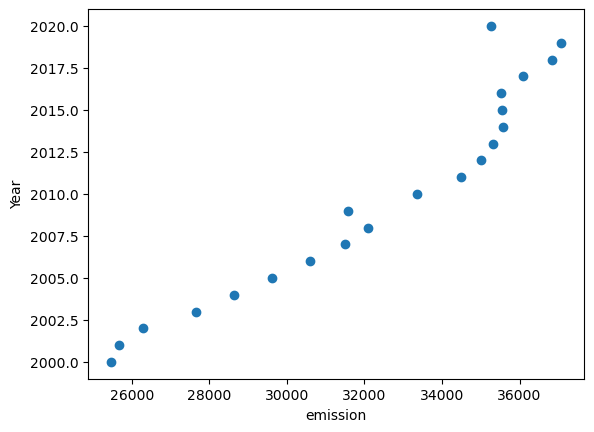

In [8]:
plt.scatter(df_emission_after2000_GLOBAL.Total, df_emission_after2000_GLOBAL.Year)
plt.xlabel('emission')
plt.ylabel('Year')
plt.show()

In [11]:
# X = df_emission_after2000_GLOBAL.Total.values.reshape(-1, 1)
X = df_emission_after2000_GLOBAL.values.reshape(-1,1)
y = df_emission_after2000_GLOBAL.Year

In [14]:
X

array([['Global'],
       ['WLD'],
       [2000],
       [25453.622139],
       [9203.117603],
       [10302.090594],
       [4731.291034],
       [721.927315],
       [278.928472],
       [216.267121],
       [4.139541],
       ['Global'],
       ['WLD'],
       [2001],
       [25668.048326],
       [9255.256797],
       [10390.668975],
       [4773.584851],
       [754.331663],
       [281.128017],
       [213.078023],
       [4.119578],
       ['Global'],
       ['WLD'],
       [2002],
       [26281.037468],
       [9678.959137],
       [10385.86418],
       [4905.85364],
       [796.052479],
       [298.553835],
       [215.754196],
       [4.163394],
       ['Global'],
       ['WLD'],
       [2003],
       [27651.596453],
       [10518.463642],
       [10679.654448],
       [5081.468111],
       [852.252693],
       [299.375515],
       [220.382043],
       [4.324685],
       ['Global'],
       ['WLD'],
       [2004],
       [28636.695037],
       [10871.584335],
       [11042.504

In [13]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

ValueError: could not convert string to float: 'Global'

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color = 'red')
plt.show()